# Course-End Project Sales Analysis

In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All lib imported')

All lib imported


In [ ]:
#load the dataset
# I loaded to my github so this url is to load from there
url1='https://github.com/shawnkan/Simpli/raw/main/1688639662_ausapparalsales4thqrt2020.xlsx'
data = pd.read_excel(url1)
print("Data Loaded")

Data Loaded


In [ ]:
data

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


## Data Wrangling

-	Ensure that the data is clean and that there is no missing or incorrect data.
-	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().


In [ ]:
#check for missing values
data.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

No missing values in the data

In [ ]:
#look at what are unique values in the data
print(data.Time.unique())
print(data.State.unique())
print(data.Group.unique())
print(data.Unit.unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']
[ 8  4 15  3 10 11 13  5  6  9 14 12 16 28 21 29 22 32 49 36 34 26 31 27
 43 50 44 20 18 19 39 17 23 40 30  7 33 42 46 48 37 25 35 45 47 38 41 24
  2 51 63 62 52 56 59 64 53 61 54 60 55 65 57 58]


In [ ]:
#understand the numeric columns, unit and sales better
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
# data standardization
# make a copy of the data and work on the copy
df = data.copy()

In [ ]:
df['Sales'] = (df['Sales']-df['Sales'].mean())/df['Sales'].std()
df['Unit'] = (df['Unit']-df['Unit'].mean())/df['Unit'].std()

In [ ]:
#check that the data is standardized
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,-0.775530,-0.775530
1,2020-10-01,Morning,WA,Men,-0.775530,-0.775530
2,2020-10-01,Morning,WA,Women,-1.085574,-1.085574
3,2020-10-01,Morning,WA,Seniors,-0.232953,-0.232953
4,2020-10-01,Afternoon,WA,Kids,-1.163085,-1.163085
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,-0.310464,-0.310464
7556,2020-12-30,Evening,TAS,Kids,-0.232953,-0.232953
7557,2020-12-30,Evening,TAS,Men,-0.232953,-0.232953
7558,2020-12-30,Evening,TAS,Women,-0.542997,-0.542997


###	Share your recommendation on the usage of the groupby() function for data chunking or merging.

In [ ]:
# grouped by state then by group to understand which group in states is contributing to sales
df.groupby(['State','Group']).sum('Sales')

Unit       Sales
State Group                           
 NSW   Kids     199.477201  199.477201
       Men      212.964106  212.964106
       Seniors  187.075449  187.075449
       Women    217.614764  217.614764
 NT    Kids    -200.091752 -200.091752
       Men     -198.153978 -198.153978
       Seniors -207.377781 -207.377781
       Women   -201.564460 -201.564460
 QLD   Kids    -112.969443 -112.969443
       Men     -116.612458 -116.612458
       Seniors -122.890845 -122.890845
       Women   -118.705253 -118.705253
 SA    Kids      73.211862   73.211862
       Men       77.552475   77.552475
       Seniors   79.490249   79.490249
       Women     87.318855   87.318855
 TAS   Kids    -197.766424 -197.766424
       Men     -198.309000 -198.309000
       Seniors -201.641971 -201.641971
       Women   -203.889789 -203.889789
 VIC   Kids     440.458748  440.458748
       Men      441.931456  441.931456
       Seniors  439.063551  439.063551
       Women    444.256785  444.256785
 WA    Kids    -202.417081 -202.417081
       Men     -198.464022 -198.464022
       Seniors -205.905073 -205.905073
       Women   -213.656168 -213.656168

In [ ]:
# grouped by state to see how much sales each state has, sort by sales values
meansales = data.groupby('State').sum()
sorted_meansales = meansales.sort_values(by='Sales', ascending=False)
print(sorted_meansales)

        Unit      Sales
State                  
 VIC   42226  105565000
 NSW   29988   74970000
 SA    23543   58857500
 QLD   13367   33417500
 TAS    9104   22760000
 NT     9032   22580000
 WA     8861   22152500


<ipython-input-14-acd31702af6e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  meansales = data.groupby('State').sum()


# 2. Data Analysis

Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).

In [ ]:
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


### Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [ ]:
#find the group that is generating the highest sales : Men
data.groupby('Group').sum(numeric_only=True).nlargest(1,'Sales')

,Unit,Sales
Group,,
Men,34300,85750000


In [ ]:
#find the group that is generating the lowest sales : Senior

data.groupby('Group').sum(numeric_only=True).nsmallest(1,'Sales')

,Unit,Sales
Group,,
Seniors,33615,84037500


### Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [ ]:
#state that is generating the highest sales is VIC
data.groupby('State').sum(numeric_only=True).nlargest(1,'Sales')

,Unit,Sales
State,,
VIC,42226,105565000


In [ ]:
#state that is generating the lowest sales is WA
data.groupby('State').sum(numeric_only=True).nsmallest(1,'Sales')

,Unit,Sales
State,,
WA,8861,22152500


In [ ]:
states_sales=df.groupby('State')['Sales'].sum()
print('Highest_states sales',states_sales.idxmax())

Highest_states sales  VIC


In [ ]:
print('lowest_states sales',states_sales.idxmin())

lowest_states sales  WA


## Generate weekly, montly and quarterly reports

In [ ]:
data['Date']

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]

In [ ]:
#7 day weekly reports on sales
data.resample('7D',on='Date')['Sales'].sum(numeric_only=True)

Date
2020-10-01    26580000
2020-10-08    27070000
2020-10-15    26577500
2020-10-22    26437500
2020-10-29    19390000
2020-11-05    20910000
2020-11-12    21545000
2020-11-19    21110000
2020-11-26    24382500
2020-12-03    31022500
2020-12-10    31917500
2020-12-17    31242500
2020-12-24    32117500
Freq: 7D, Name: Sales, dtype: int64

In [ ]:
#weekly sales report using monday as the first day
weekly_report=data.resample('W-Mon',on='Date')['Sales'].sum(numeric_only=True)
weekly_report

Date
2020-10-05    18907500
2020-10-12    26935000
2020-10-19    26805000
2020-10-26    26590000
2020-11-02    20797500
2020-11-09    21065000
2020-11-16    21242500
2020-11-23    21187500
2020-11-30    21442500
2020-12-07    30817500
2020-12-14    32060000
2020-12-21    31247500
2020-12-28    32007500
2021-01-04     9197500
Freq: W-MON, Name: Sales, dtype: int64

In [ ]:
#the week that gives the smallest sales

weekly_report_smallest=data.resample('7D',on='Date')['Sales'].sum(numeric_only=True).nsmallest(1)
weekly_report_smallest
#W-Mon gives a different answer

Date
2020-10-29    19390000
Freq: 7D, Name: Sales, dtype: int64

In [ ]:
# monthly sales report
# highest month is Decemeber

monthly_report=data.resample('M',on='Date')['Sales'].sum(numeric_only=True)
monthly_report

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

In [ ]:
# quarterly sales report but no point because only one quarter

monthly_report=data.resample('Q',on='Date')['Sales'].sum(numeric_only=True)
monthly_report

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

No point doing quarterly because its only one *quarter*

In [ ]:
# Report by time of the day (Morning, Afternoon, Evening)
# Morning has more sales

time_report = data.groupby('Time')['Sales'].sum().sort_values()
time_report

Time
 Evening      112087500
 Afternoon    114007500
 Morning      114207500
Name: Sales, dtype: int64

# 3. Data Visualisation

### State-wise sales analysis for different groups (kids, women, men, and seniors)

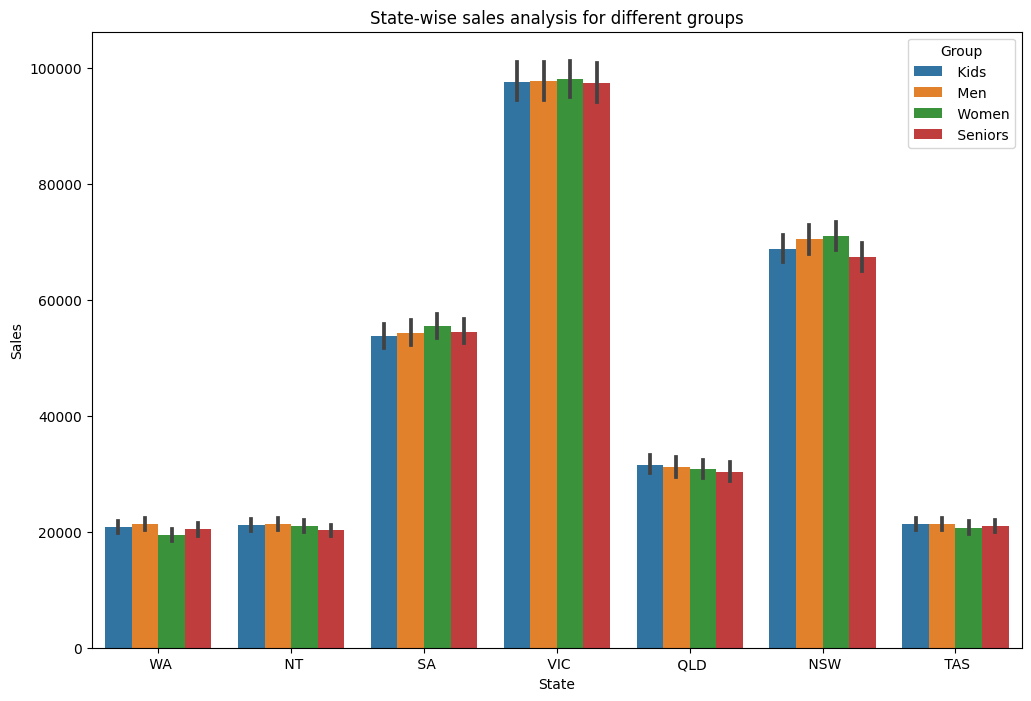

In [ ]:
# Seaborn for bar plot of states then divided into groups
# more colourful and interactive. also shows variation for each bar
plt.figure(figsize=(12,8))
sns.barplot(x=data['State'],y=data['Sales'],hue='Group',data=data)
plt.title('State-wise sales analysis for different groups')
plt.show()

### Group-wise sales analysis across different states

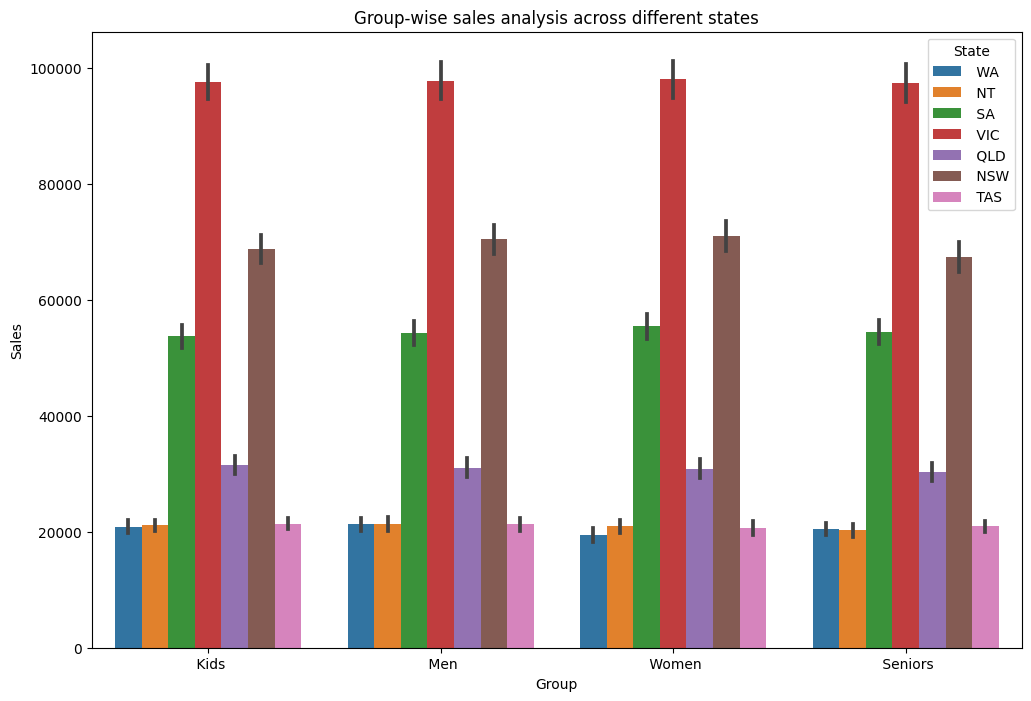

In [ ]:
# Seaborn for bar plot of groups then divided by states
# more colourful can see results at a glance. also shows variation for each bar

plt.figure(figsize=(12,8))
sns.barplot(x=data['Group'],y=data['Sales'], hue='State', data=data)
plt.title('Group-wise sales analysis across different states')
plt.show()

### ○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?

Text(0.5, 1.0, 'Time of the day Analysis By States')

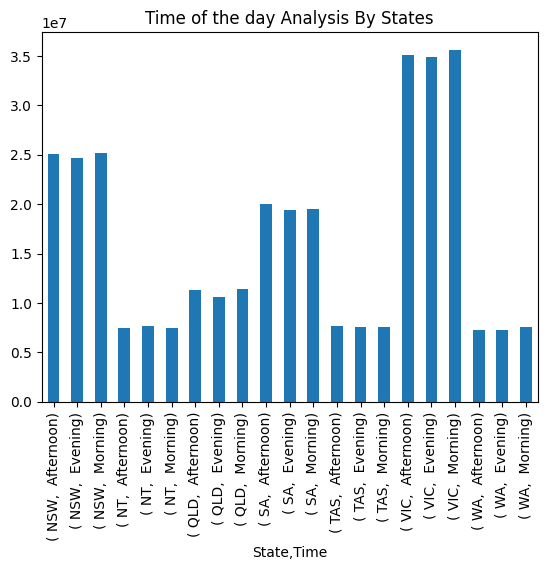

In [ ]:
data.groupby(['State','Time'])['Sales'].sum().plot(kind='bar', stacked=True)
plt.title('Time of the day Analysis By States')

# quite close for all times of the day

Text(0.5, 1.0, 'Grouped Time of the day Analysis')

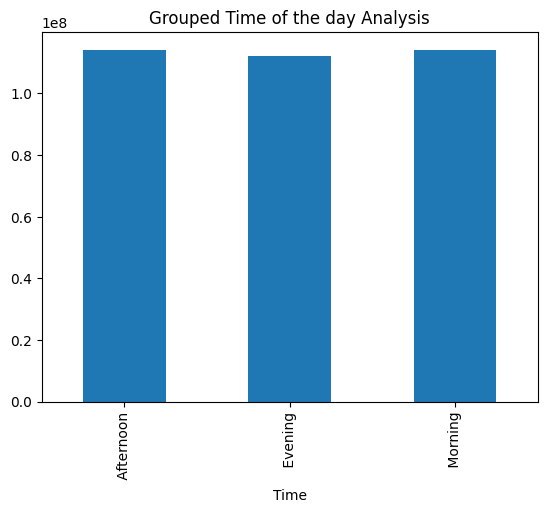

In [ ]:
# grouping helps to see which time of the day have greatest sales.
# in this case, not much difference using bar chart

data.groupby('Time')['Sales'].sum().plot(kind='bar')
# itsplt.title('Grouped Time of the day Analysis')

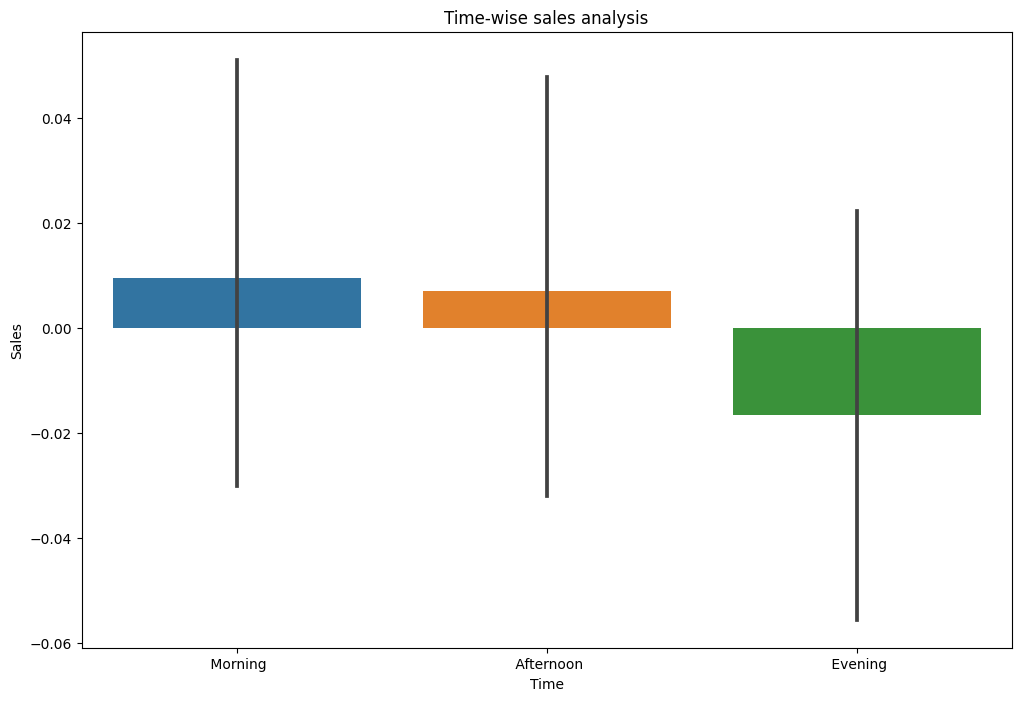

In [ ]:
# Using box plot and the standardized values, its more obvious

plt.figure(figsize=(12,8))
sns.barplot(x=df['Time'],y=df['Sales'], data=df)
plt.title('Time-wise sales analysis')
plt.show()

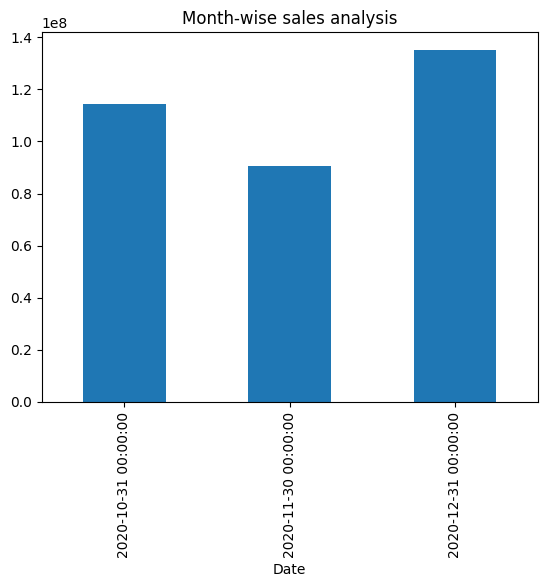

In [ ]:
# bar chart by month shows obviously which month has more sales
data.resample('M',on='Date')['Sales'].sum(numeric_only=True).plot(kind='bar')
plt.title('Month-wise sales analysis')
plt.show()